<a href="https://colab.research.google.com/github/DrBart20/EksploracjaDanych/blob/main/zaj4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


In [ ]:
np.random.seed(42)

x = np.random.normal(0, 5, 1000)

a = 2.5
b = -1

y = a * x + b

y_ = stats.linregress(x, y)

a_ = y_.slope
b_ = y_.intercept

print(f"a: {a_}")
print(f"b: {b_}")

a: 2.5000000000000004
b: -1.0000000000000002


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

Współczynnik korelacji Pearsona: -0.2770217010684072
Wartosc p: 0.0020083520333510118


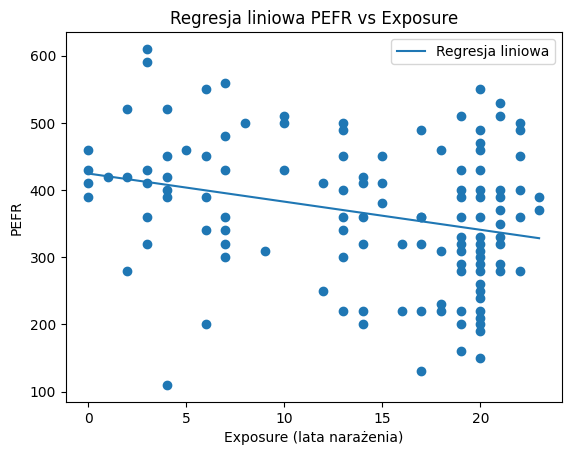

In [ ]:
data = pd.read_csv("LungDisease.csv")
#print(data.head())

#plt.figure()
#plt.scatter(data["Exposure"], data["PEFR"])
#plt.xlabel("Exposure")
#plt.ylabel("PEFR")
#plt.title("Wykres")
#lt.show()

corr, p_value = stats.pearsonr(data["Exposure"], data["PEFR"])
print(f"Współczynnik korelacji Pearsona: {corr}")
print(f"Wartosc p: {p_value}")

slope, intercept, r_value, p_value, std_err = stats.linregress(data["Exposure"], data["PEFR"])

a,b = np.polyfit(data["Exposure"], data["PEFR"], 1)

x = np.linspace(data["Exposure"].min(), data["Exposure"].max(), 100)
y = a * x + b

plt.figure()
plt.scatter(data["Exposure"], data["PEFR"])
plt.plot(x, y, label="Regresja liniowa")
plt.xlabel("Exposure (lata narażenia)")
plt.ylabel("PEFR")
plt.title("Regresja liniowa PEFR vs Exposure")
plt.legend()
plt.show()

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



In [30]:
data = pd.read_csv("anscombe.csv")

new_headers = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]
data.columns = new_headers

data = data.iloc[1:]

for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')



data = data.reset_index(drop=True)

print(data.dtypes)
print(data.head())

x1    float64
y1    float64
x2    float64
y2    float64
x3    float64
y3    float64
x4    float64
y4    float64
dtype: object
     x1    y1    x2    y2    x3     y3   x4    y4
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47


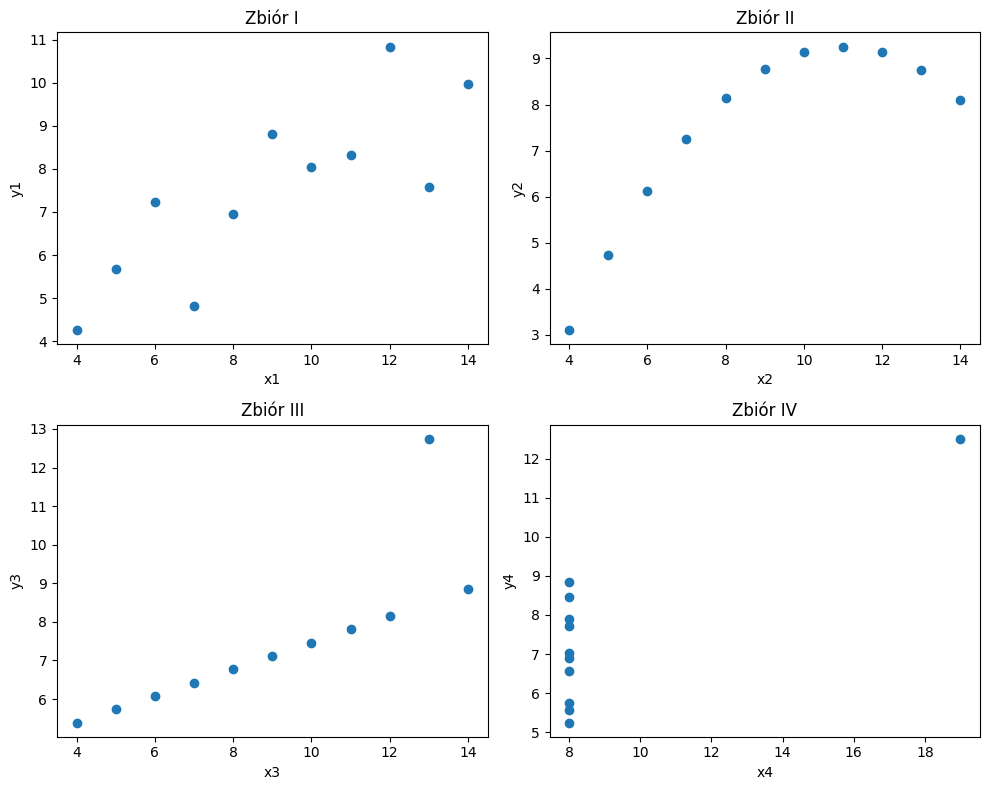

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

pairs = [(1, 'I'), (2, 'II'), (3, 'III'), (4, 'IV')]

for ax, (i, label) in zip(axes, pairs):
    x = data[f'x{i}']
    y = data[f'y{i}']
    ax.scatter(x, y)
    ax.set_title(f"Zbiór {label}")
    ax.set_xlabel(f"x{i}")
    ax.set_ylabel(f"y{i}")

plt.tight_layout()
plt.show()

In [28]:
results = {}

for i in range(1, 5):
    x = data[f'x{i}']
    y = data[f'y{i}']

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    print(f"Zestaw {i}")
    print(f"a (nachylenie): {slope}")
    print(f"b (wyraz wolny): {intercept}")
    print(f"błąd a: {std_err}")
    print(f"r (korelacja): {r_value}")

Zestaw 1
a (nachylenie): 0.5000909090909091
b (wyraz wolny): 3.0000909090909103
błąd a: 0.11790550059563408
r (korelacja): 0.8164205163448399
Zestaw 2
a (nachylenie): 0.5000000000000001
b (wyraz wolny): 3.000909090909089
błąd a: 0.11796374596764074
r (korelacja): 0.816236506000243
Zestaw 3
a (nachylenie): 0.4997272727272729
b (wyraz wolny): 3.002454545454544
błąd a: 0.11787766222100221
r (korelacja): 0.8162867394895984
Zestaw 4
a (nachylenie): 0.4999090909090909
b (wyraz wolny): 3.0017272727272726
błąd a: 0.11781894172968553
r (korelacja): 0.8165214368885028


In [29]:
for i in range(1,5):
    x = data[f'x{i}']
    y = data[f'y{i}']
    corr, p_value = stats.pearsonr(x, y)
    print(f"Zestaw {i}")
    print(f"Współczynnik korelacji Pearsona: {corr}")

Zestaw 1
Współczynnik korelacji Pearsona: 0.8164205163448395
Zestaw 2
Współczynnik korelacji Pearsona: 0.8162365060002426
Zestaw 3
Współczynnik korelacji Pearsona: 0.816286739489598
Zestaw 4
Współczynnik korelacji Pearsona: 0.8165214368885028
